# Figures 16 17 18 19

## pH-rate Data

This workbook contains the code and imports the data to explore the Beckmann hammett plot.

The data being pklotted is from "On the Rearrangement in Dioxane/Water of (*Z*)-Arylhydrazones of 5-Amino-3-benzoyl-1,2,4-oxadiazole into (2-Aryl-5-phenyl-2*H*-1,2,3-triazol-4-yl)ureas: Substituent Effects on the Different Reaction Pathways." F. D'Anna, V. Frenna, G. Macaluso, S. Marullo, S. Morganti, V. Pace, D. Spinelli, R. Spisani, C. Tavani, *J. Org. Chem.*, **2006**, *71*, 5616-5624. https://doi.org/10.1021/jo0605849

The data is found in tables within the supplementary material at https://ndownloader.figstatic.com/files/4775281


## Setup Tools and Read Data Table

Here the data table is read in and processed. Also the libraries are imported and any functions defined

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import uncertainties as un
from uncertainties import unumpy as unp

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
github_location = "./data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

#################################################################
### a function calculate rsq for data and a model with parameters
#################################################################

def rsq(x, y, popt, model):
    ### RSQ calc from https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
    y_calc = model(x, *popt)
    residuals = y-y_calc
    
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)   # calculate correlation constant rsq
    return(r_squared)


In [101]:
############################################
### Read in data from literature example ###
############################################

datafile = "1f-data.csv"   # Change this file name as you swith data sets

############################################



df = pd.read_csv(github_location + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="pS+", 
                 comment = "#") 
#display(Beckmann_data.head())

###
### Note: The values of the rate constants are relative ratyes k_H/k_X
###

###############################
### Remove unneeded columns ###
###############################

#df.drop(labels = ["Name", "ref"], axis = 1, inplace = True)  # remove unwanted columns
#print(df.columns)

#########################################################
### Determine scale from column header name           ###
#########################################################

if df.columns[0] == "k(A,R)x10^5":
    name = "k(A,R)x10^5"
    colname = df.columns[0]
    factor = 10**-5
elif df.columns[0] == "k(A,R)x10^4":
    name = "k(A,R)x10^4"
    colname = df.columns[0]
    factor = 10**-4

###############################
### Calculations            ###
###############################

df["log_k"] = np.log10(df[name] * factor)

display(df.head())

,"k(A,R)x10^5",BUFFER,log_k
pS+,,,
0.12,30.6,HCl,-3.514279
0.22,27.5,HCl,-3.560667
0.33,24.5,HCl,-3.610834
0.39,22.3,HCl,-3.651695
0.48,19.9,HCl,-3.701147


## Plot and Curve Fits

The code below will extract the x,y data for our plots and make the plot.  Here is also code to fit the data according to the three rate constants of the reaction and acidity.

## Figures 16 and 18 and also 17 and 19

the code below with create figures 16 and 18 by chaning the q and r values accordingly. Then it will create figures 17 and 19.

just change the commented lines at the top of each code block.

Ka = (3.644+/-0.307)e-01
kOH = (7.025+/-0.121)e+01
kH2O = (2.466+/-0.063)e-06
kH = (4.505+/-0.275)e-04
pKa = 0.44+/-0.04
rsq = 9.99573e-01


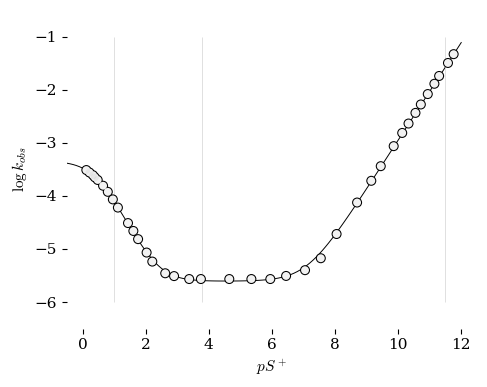

In [ ]:
# ASSIGNING SLOPES TO THE H+ AND OH- REGIONS AND CHECKING FIT


###################################################################
### Change thes itemns to alternate between figures 16 and 18
###################################################################

q, r = 1.0, 1.0       # for figure 16,17
#q, r = 0.92, 1.13    # for figure 18,19

savefile = "images/figure_16_plot.pdf"   # use this to save figure 16
#savefile = "images/figure_18_plot.pdf"   # use this to save figure 18

###################################################################
###################################################################

from scipy.optimize import curve_fit

def model(pH, Ka = -1.0, kOH=1.0, kH2O = 1.0, kH = 1.0):    
    """
    model(x, Ka, kOH, kH2O, kH)
    pH is an array of pH values
    returns an array of log(k_obs) values
    """
    KW = 10**(-14)
    H = 10**(-pH)
    k_obs = (kOH * (KW/H**(q)) + kH2O + kH *(H**r/(Ka + H**r)))
    return(np.log10(k_obs))

#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

x = (df.index)
y = (df["log_k"])

##################################################
### Curve Fit                                  ###
##################################################

lower_bounds = [0.1, 0.0, 0.0, 0.0]    # lower bounds for Ka, kOH, kH2O, kH
upper_bounds = [10,10000,10000,10000] # upper bounds for Ka, kOH, kH2O, kH
bounds_list = (lower_bounds, upper_bounds)

parameters, pcov = curve_fit(model, x, y, bounds = bounds_list)  # Curve fit the model to the x,y data using bounding limits
param_u = un.correlated_values(parameters, pcov)

[Ka, kOH, kH2O, kH] = param_u
perr = np.sqrt(np.diag(pcov))
rsq_value = rsq(x, y, parameters, model)


#######################################################
### Print out Parameters and standard deviations    ###
#######################################################

print(f"Ka = {Ka:0.3e}")
print(f"kOH = {kOH:0.3e}")
print(f"kH2O = {kH2O:0.3e}")
print(f"kH = {kH:0.3e}")
print(f"pKa = {-unp.log10(Ka):0.2f}")
print(f"rsq = {rsq_value:0.5e}")

################################################################
### make a line from the parameters and the model            ###
### this would be the line of the curve fit when plotted     ###
################################################################

step = 0.1
#x1 = np.arange(np.min(x), np.max(x)+step, step)
x1 = np.arange(-0.5, 12 + step, step)   # make an array of points to calculate y-values from
y1 = model(x1, Ka.n, kOH.n, kH2O.n, kH.n)     # Calculate those y-values using the model



##################################################
### Setup a figure and choose a stylesheet     ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Set labels and scale ###
############################

ax.set(
#    title="pH rate profilr",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=r"$pS^+$",                
          xlim=[-.5,12.5],                  
          ylim=[-6.5,-0.5]
         )

#########################################
### Plot the data                     ###
#########################################

plt.vlines([1,3.8,11.5],-6,-1, colors = "lightgray", linewidth = 0.5)

#ax.scatter(x,y, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=52, color="black",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=32, color="white",  edgecolors = "none", alpha = 1, zorder=2)
ax.scatter(x,y, s=32, color="gray",  edgecolors = "none", alpha = 0.1, zorder=2)

#########################################
### Plot the line fit.                ###
#########################################

ax.plot(x1, y1, color='black', zorder=0, linewidth=0.7)

#############################
### Output the final plot ###
#############################

fig.savefig(savefile)   

plt.show()                 # output the combined plot plots

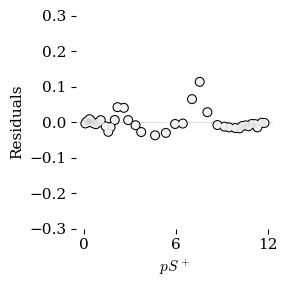

In [ ]:
###################################################################
### Change thes itemns to alternate between figures 17 and 19
###################################################################

savefile = "images/figure_17_plot.pdf"   # use this to save figure 16
#savefile = "images/figure_19_plot.pdf"   # use this to save figure 18


###################################################################
###################################################################

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size3 = [3,3]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size3)  


######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = model(x, Ka.n, kOH.n, kH2O.n, kH.n)-y

ax.set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"$pS^+$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-.3,0.3],
          xticks = [0,6,12]
       )

### Data graphics

#ax.scatter(x,residuals, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(x,residuals, s=52, color="black",  edgecolors = "none", zorder=2)
ax.scatter(x,residuals, s=32, color="white",  edgecolors = "none", alpha = 1, zorder=2)
ax.scatter(x,residuals, s=32, color="gray",  edgecolors = "none", alpha = 0.1, zorder=2)


#ax.scatter(x, residuals, marker = "o", s = 20, 
#              color = "white", edgecolors = "black", 
#              linewidths=0.5, zorder = 3)
#ax.errorbar(x, residuals, yerr=y_err*sigma, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, 
#             #  capsize=2, capthick=0.5, 
#               zorder=2)

ax.axhline(0, color='lightgray', linewidth=0.5, zorder=0)
#ax.set_xticks([])

#plt.show()

### Output plot
plt.tight_layout()
fig.savefig(savefile)   # use this to save figure 17

plt.show()


## Optimizing slopes separately

This code optimizes for the slopes of the $H^+$ region and the slope of the $OH^-$ region. 

Ka = (4.458+/-0.971)e-01
kOH = (4.750+/-0.701)e+01
kH2O = (2.479+/-0.068)e-06
kH = (4.923+/-0.553)e-04
q = (1.100+/-0.030)e+00
r = (9.367+/-0.062)e-01
pKa = 0.35+/-0.09
rsq = 9.99624e-01


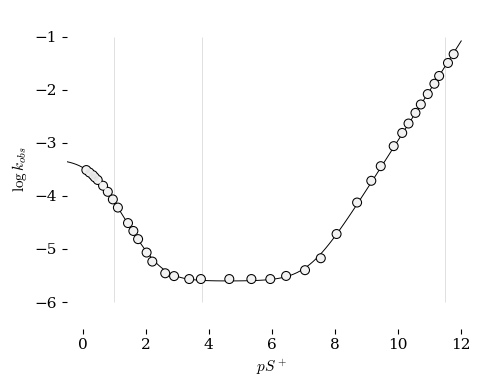

In [104]:
### BEST FIT FOR THE SLOPES OF THE H+ AND OH- REGIONS
### q is best fit slope for H+, r is best fit slope for OH-

from scipy.optimize import curve_fit

def modelq(pH, Ka = 0, kOH=1.0, kH2O = 1.0, kH = 1.0, q = 1.0, r = 1.0):    
    """
    model(x, Ka, kOH, kH2O, kH, q)
    pH is an array of pH values
    returns an array of log(k_obs) values
    """
    #q = 1.0
    KW = 10**(-14)
    H = 10**(-pH)
    k_obs = (kOH * (KW/H**r) + kH2O + kH *(H**q/(Ka + H**q)))
    return(np.log10(k_obs))

#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

x = (df.index)
y = (df["log_k"])

##################################################
### Curve Fit                                  ###
##################################################

lower_bounds = [0.01, 0.0, 0.0, 0.0, 0.9, 0.9]    # lower bounds for Ka, kOH, kH2O, kH
upper_bounds = [10,10000,10000,10000, 1.1, 1.1]   # upper bounds for Ka, kOH, kH2O, kH
bounds_list = (lower_bounds, upper_bounds)

parameters, pcov = curve_fit(modelq, x, y, bounds = bounds_list)  # Curve fit the model to the x,y data using bounding limits
param_u = un.correlated_values(parameters, pcov)

[Ka, kOH, kH2O, kH, q, r] = param_u
perr = np.sqrt(np.diag(pcov))
rsq_value = rsq(x, y, parameters, modelq)



#######################################################
### Print out Parameters and standard deviations    ###
#######################################################

print(f"Ka = {Ka:0.3e}")
print(f"kOH = {kOH:0.3e}")
print(f"kH2O = {kH2O:0.3e}")
print(f"kH = {kH:0.3e}")
print(f"q = {q:0.3e}")
print(f"r = {r:0.3e}")
print(f"pKa = {-unp.log10(Ka):0.2f}")
print(f"rsq = {rsq_value:0.5e}")

################################################################
### make a line from the parameters and the model            ###
### this would be the line of the curve fit when plotted     ###
################################################################

step = 0.1
#x1 = np.arange(np.min(x), np.max(x)+step, step)
x1 = np.arange(-0.5, 12 + step, step)   # make an array of points to calculate y-values from
y1 = modelq(x1, Ka.n, kOH.n, kH2O.n, kH.n, q.n, r.n)     # Calculate those y-values using the model



##################################################
### Setup a figure and choose a stylesheet     ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Set labels and scale ###
############################

ax.set(
#    title="pH rate profilr",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=r"$pS^+$",                
          xlim=[-.5,12.5],                  
          ylim=[-6.5,-0.5]
         )

#########################################
### Plot the data                     ###
#########################################

plt.vlines([1,3.8,11.5],-6,-1, colors = "lightgray", linewidth = 0.5)

#ax.scatter(x,y, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=52, color="black",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=32, color="white",  edgecolors = "none", alpha = 1, zorder=2)
ax.scatter(x,y, s=32, color="gray",  edgecolors = "none", alpha = 0.1, zorder=2)

#########################################
### Plot the line fit.                ###
#########################################

ax.plot(x1, y1, color='black', zorder=0, linewidth=0.7)

#############################
### Output the final plot ###
#############################

fig.savefig("images/23F_Fig18_BetterFit.pdf")   # use this to save the figure in PDF format
plt.show()                                    # output the combined plot plots

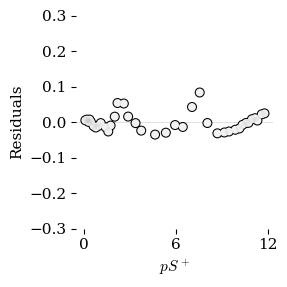

In [105]:

###############################################################################
######################
### Plots - NEW STYLED PLOTTING SECTION
######################

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size3 = [3,3]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size3)  


######################
### Plot the residuals
######################

# difference between data and line-fit
residuals = modelq(x, Ka.n, kOH.n, kH2O.n, kH.n, q.n, r.n)-y

ax.set(
#          title = Title,       
          ylabel=r"Residuals", 
          xlabel=r"$pS^+$",                
#          xlim=[0, np.max(x) + np.max(x) * 0.1],                  
          ylim=[-.3,0.3],
          xticks = [0,6,12]
       )

### Data graphics

#ax.scatter(x,residuals, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(x,residuals, s=52, color="black",  edgecolors = "none", zorder=2)
ax.scatter(x,residuals, s=32, color="white",  edgecolors = "none", alpha = 1, zorder=2)
ax.scatter(x,residuals, s=32, color="gray",  edgecolors = "none", alpha = 0.1, zorder=2)


#ax.scatter(x, residuals, marker = "o", s = 20, 
#              color = "white", edgecolors = "black", 
#              linewidths=0.5, zorder = 3)
#ax.errorbar(x, residuals, yerr=y_err*sigma, xerr=None, fmt="None", 
#               ecolor="black", elinewidth=0.5, 
#             #  capsize=2, capthick=0.5, 
#               zorder=2)

ax.axhline(0, color='lightgray', linewidth=0.5, zorder=0)
#ax.set_xticks([])

#plt.show()

### Output plot
plt.tight_layout()
fig.savefig("images/23F_Fig18_BetterFit_residuals.pdf")   # use this to save the figure in PDF format
plt.show()
